<a href="https://colab.research.google.com/github/upagyya/MIDAS_TASK/blob/main/Data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Data Cleaning

# Handling Missing Data Values


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\flipcart.csv")

In [ ]:
df.shape

(20000, 15)

In [ ]:
df.head(6)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head(6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [ ]:
df.isnull()

In [ ]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

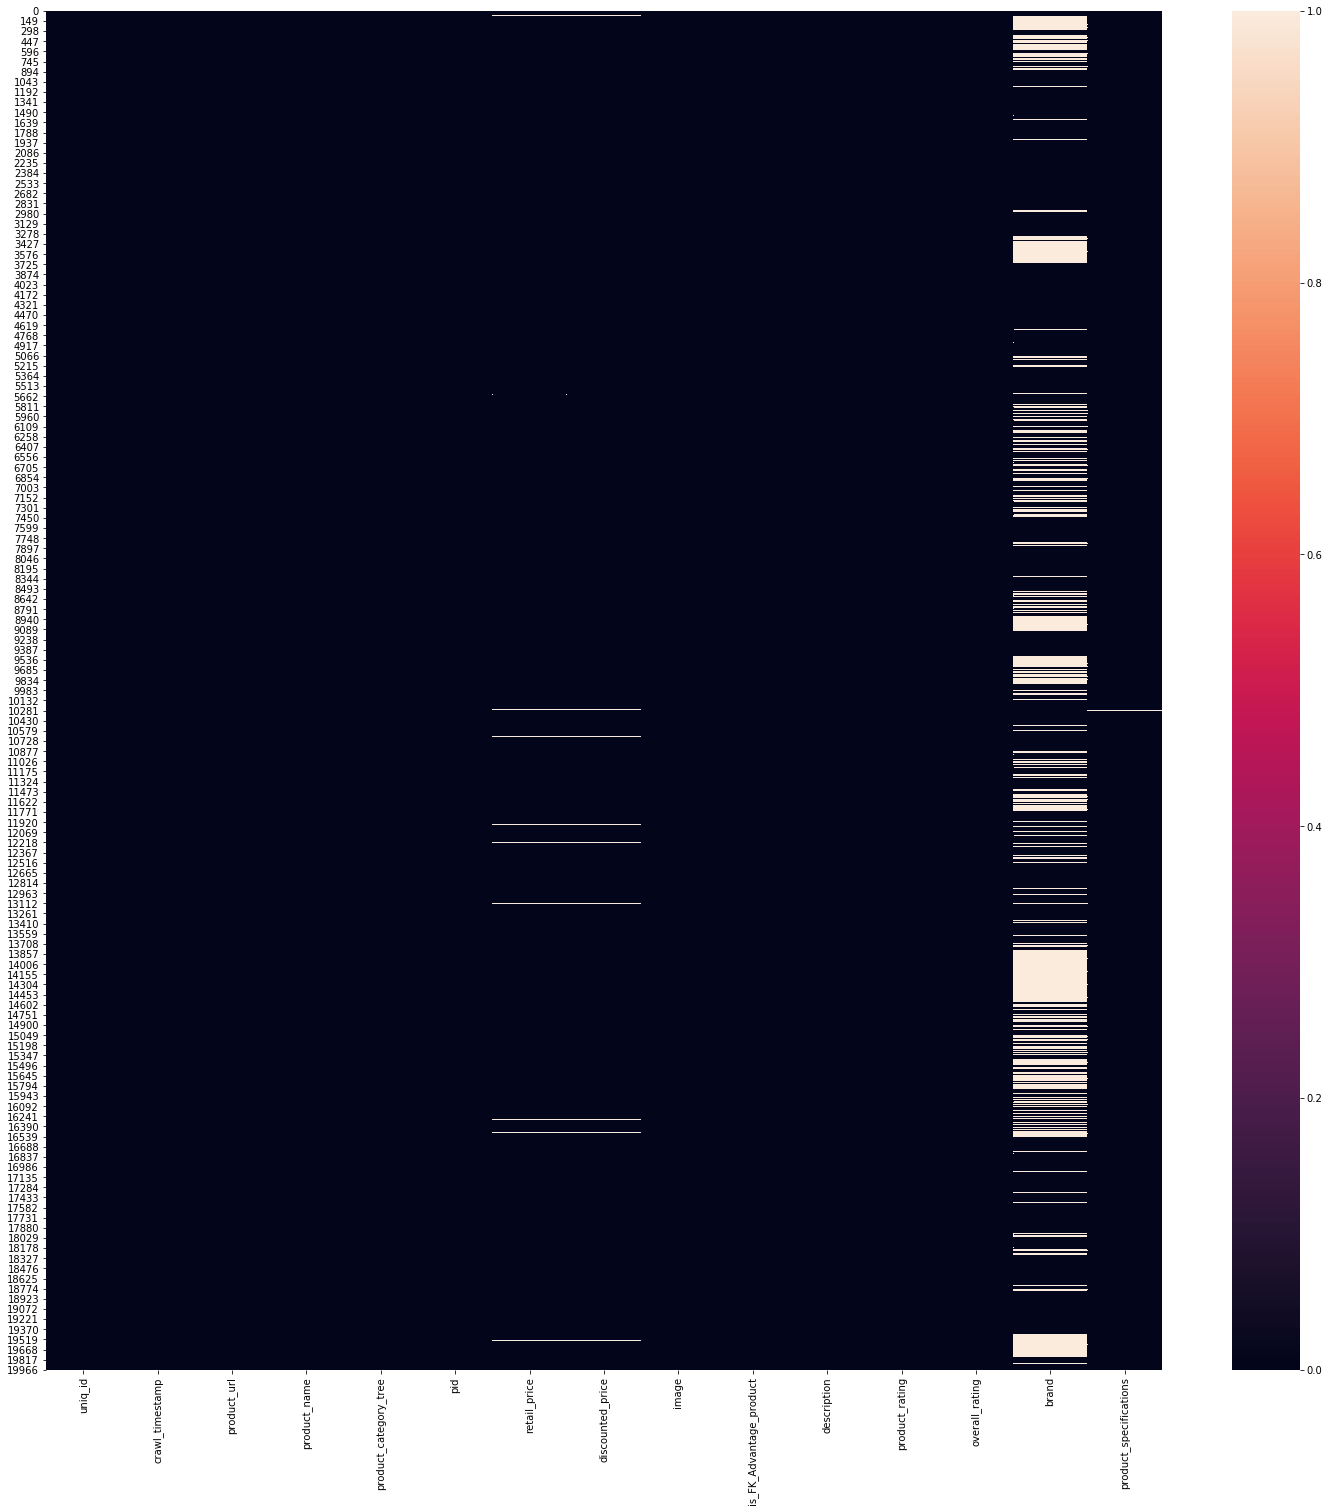

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.isnull())

In [ ]:
df.isnull().sum()/df.shape[0] *100

uniq_id                     0.000
crawl_timestamp             0.000
product_url                 0.000
product_name                0.000
product_category_tree       0.000
pid                         0.000
retail_price                0.390
discounted_price            0.390
image                       0.015
is_FK_Advantage_product     0.000
description                 0.010
product_rating              0.000
overall_rating              0.000
brand                      29.320
product_specifications      0.070
dtype: float64

In [ ]:
null_var = df.isnull().sum()/df.shape[0] *100

In [ ]:
drop_col = null_var[null_var >20].keys()
drop_col

Index(['brand'], dtype='object')

In [ ]:
df2_drop_col=df.drop(columns=drop_col)

In [ ]:
df2_drop_col.shape

(20000, 14)

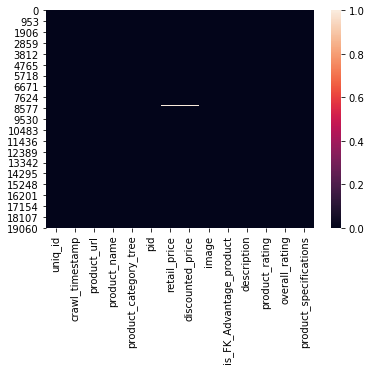

In [ ]:
sns.heatmap(df2_drop_col.isnull())

In [ ]:
df3_drop_rows = df2_drop_col.dropna()

In [ ]:
df3_drop_rows.shape

(19905, 14)

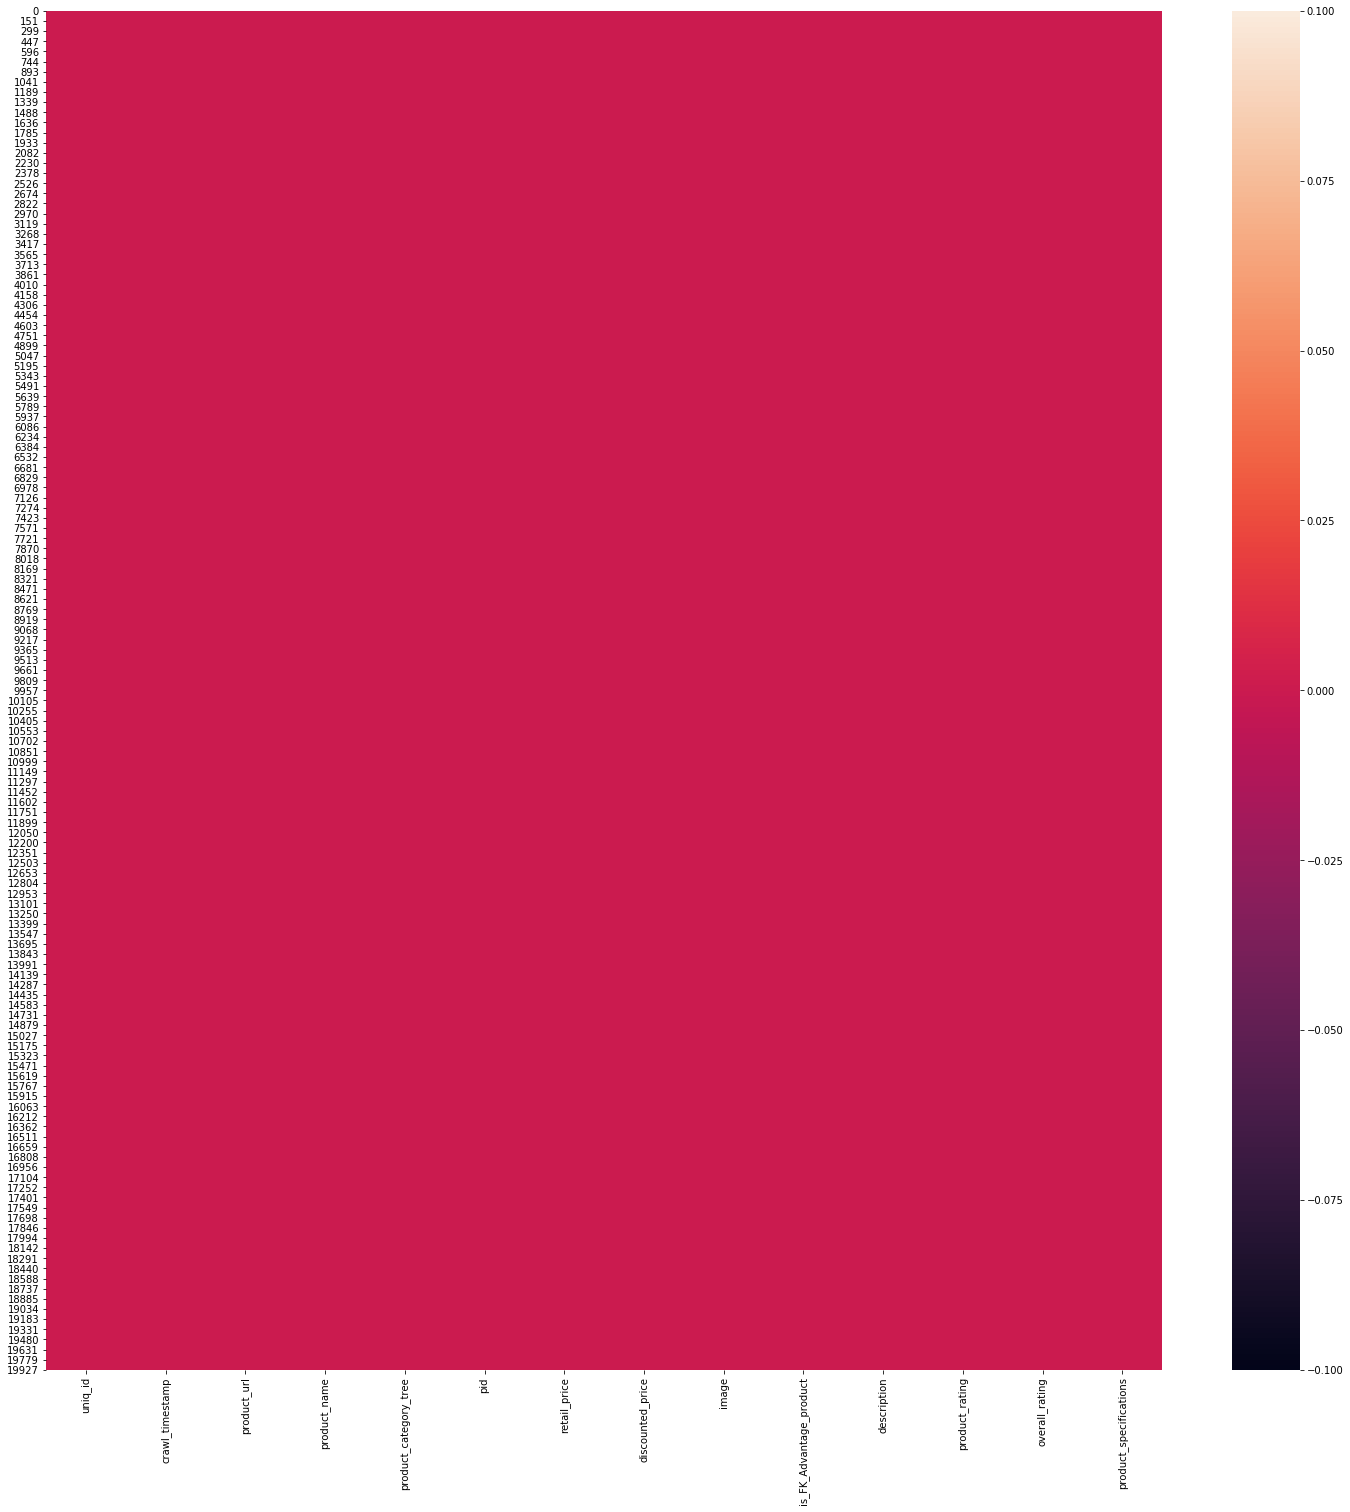

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df3_drop_rows.isnull())

In [ ]:
#no missing values are there
df3_drop_rows.isnull().sum().sum()

0

In [ ]:
df3_drop_rows.select_dtypes(include=['int64','float64']).columns

Index(['retail_price', 'discounted_price'], dtype='object')

In [ ]:
sns.distplot(df['retail_price'])

In [ ]:
sns.distplot(df3_drop_rows['retail_price'])

In [ ]:
sns.distplot(df['retail_price'])
sns.distplot(df3_drop_rows['retail_price'])

In [ ]:
num_var = ['retail_price', 'discounted_price']
plt.figure(figsize=(25,25))
for i, var in enumerate(num_var):
    plt.subplot(2,1,i+1)
    sns.distplot(df[var], bins=20)
    sns.distplot(df3_drop_rows[var], bins=20)

In [ ]:
df3_drop_rows.select_dtypes(include=['object']).columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'image', 'description',
       'product_rating', 'overall_rating', 'product_specifications'],
      dtype='object')

In [ ]:
pd.concat([df['uniq_id'].value_counts()/df.shape[0] * 100,
           df3_drop_rows['uniq_id'].value_counts()/df3_drop_rows.shape[0] * 100], axis=1, keys=['uniq_id_org','uniq_id_clean'])

In [ ]:
def cat_var_dist(var):
    return pd.concat([df[var].value_counts()/df.shape[0] * 100,
           df3_drop_rows[var].value_counts()/df3_drop_rows.shape[0] * 100], axis=1, keys=[var+'_org',var+'_clean'])
    
    

In [ ]:
cat_var_dist('uniq_id')

uniq_id_org  uniq_id_clean
82e208c0b2fde6b5632455420706e920        0.005       0.005024
6452415f57839223890b9dff1f44a3cd        0.005       0.005024
46c5055b83ca83f2c5a03a54f766e2a8        0.005       0.005024
c1c2a432569467f952856ee27f17f705        0.005       0.005024
f3069dd2e52125d94221b59396bbd56d        0.005       0.005024
4646f44e4fd0bc8672760e5f834e1870        0.005       0.005024
9b0d810f09ac335158d44ebb85c56a24        0.005       0.005024
68ec948becf54d22b95830adb3e46e7b        0.005       0.005024
a02d041c1ecf38616bf9b6cd8b44d760        0.005       0.005024
0363713ab62458ee739a2b77150b9862        0.005       0.005024
cad300c344ed657ffdfb6428a30b87ee        0.005       0.005024
ff304e1d4dbca72deffbeb92de2fa8c1        0.005       0.005024
618951241fc0b35cf215acfc026b8904        0.005       0.005024
3edc165046de6e149671e55009539c7e        0.005       0.005024
9c141a5abaf6473ee56b1fba3bf371d4        0.005       0.005024
90b0ce96387325bd71c38832b1df285b        0.005       0.005024
660c054de05748f29ff6322304437361        0.005       0.005024
d25bcb5e5ca4e021c0439e8eed3d537c        0.005       0.005024
dd9a5979c32bbdd836984529af862303        0.005       0.005024
699baf865bdaa15fc42a8623eda7d8e4        0.005       0.005024
5fd4b79534a2c63ad2b8c465042c19c2        0.005       0.005024
a0f262830d970a2921ca58ce6177fdbc        0.005       0.005024
0d034c45e8961f82a7132bd02302483a        0.005       0.005024
b2ab177fca114513ad5e8cc5c5d77987        0.005       0.005024
9d647d784054476c87ee1c7d1fdde654        0.005       0.005024
fc2f57fbe1b66a0dd1df7621a9a34652        0.005       0.005024
38f50499eacfa1e747c0b10735325dbf        0.005       0.005024
cc0bc20b12c3e58a80af012927d610c8        0.005       0.005024
8efc726e703abeedcd4e64ed7c1c2d51        0.005       0.005024
7858864562dfef7b6d6e2f3d2ec170f9        0.005       0.005024
23d475a733b3c6b1e29b3a8070e974aa        0.005       0.005024
972081aefbb38198bd9b7f5afa576098        0.005       0.005024
d460718bc61f70b1b9931470ff00ddd4        0.005       0.005024
fc97bbe2809816e4d19827003e25cbe5        0.005       0.005024
bd0ff557a00dc8f85b4a3e0926173d71        0.005       0.005024
b7eea98ef0391888fb3cd6c439aebcf6        0.005       0.005024
10ea0e5628896d5666b965846d4ac019        0.005       0.005024
8396a224f925b8dd6ecae7831b50d605        0.005       0.005024
b7dc0087348ad77ccc09ab6a9c09d2da        0.005       0.005024
da658b33c149dc1234cbe6cee341d0e2        0.005       0.005024
ab2b84daf6f012ef09b0b6a16b582a19        0.005       0.005024
fb66a416afc11f29c226e47e03b3989c        0.005       0.005024
66498ec712dd9a570d6b3b96ed54f1c3        0.005       0.005024
66f41f1c9d80dd300f4e80c15b64ff0b        0.005       0.005024
f9f8bf15974ec299594cb0b314aaf3ce        0.005       0.005024
9742dbcc467fdb86d768788ff86b2fb7        0.005       0.005024
20436c1a82d71ee731104497e99a4a8d        0.005       0.005024
9e1aec66379f2d50210c74443f86525c        0.005       0.005024
76843cd71ed3145c2930adbf29a26bf5        0.005       0.005024
c6fd85662bd39ecd8aa651c239edcc98        0.005       0.005024
312c74f70964f9511972e7359e7564e8        0.005       0.005024
a1f209c9b4bc8b9ca8f44b57f2c95d4a        0.005       0.005024
af5911c39f66faa5106592380098e9db        0.005       0.005024
6b61674fa2d7af0f81b34142ab913d0b        0.005       0.005024
8d50741a7ea91f263bd57577c2efad24        0.005       0.005024
c8581da6ebef6a740303c70f3417fbb7        0.005       0.005024
e21d1c5cb6be49ef2f4aef7445bc8e3a        0.005       0.005024
a8293602876a2c65520a61c127522f77        0.005       0.005024
9b81fd101c7a877fea64446c1af1279b        0.005       0.005024
be26ff25db9e5e9f4136754feab6c682        0.005       0.005024
5effa019f16fe1b2ac81da1a356688b3        0.005       0.005024
4dbb7047c03bad7e9b9e1940c3ec4c7c        0.005       0.005024
ad4a7acc5735baf845bd86e22fddb887        0.005       0.005024
0ceea01494347c4492671740259124d3        0.005       0.005024
d77a73589ff51af3aae096034894978b        0.005       0.005024
8e837df4